In [13]:
library(ggplot2)
library(data.table)
library(tidyr)
library(dplyr)

# Cell type proportion plots

# Blood

In [3]:
props = fread('../data/xcell/xcell_props.csv', sep='\t')
wide = props[,-1] %>% t() %>% as.data.frame() %>% setNames(props[,1][[1]]) %>%  tibble::rownames_to_column("Sample")
# reorder
cmns = colMeans(wide[,-1])
ord = c(1, order(-cmns) + 1)
wide = wide[,ord]
long <- wide %>% pivot_longer(cols=!Sample, names_to='Cell', values_to='Prop')
levels = c('B', 'CD4', 'CD8', 'NK', 'Monocyte', 'DC', 'Myeloids', 'Stem', 'Lymphoids')

Warning message:
“Removed 3 rows containing non-finite outside the scale range (`stat_boxplot()`).”


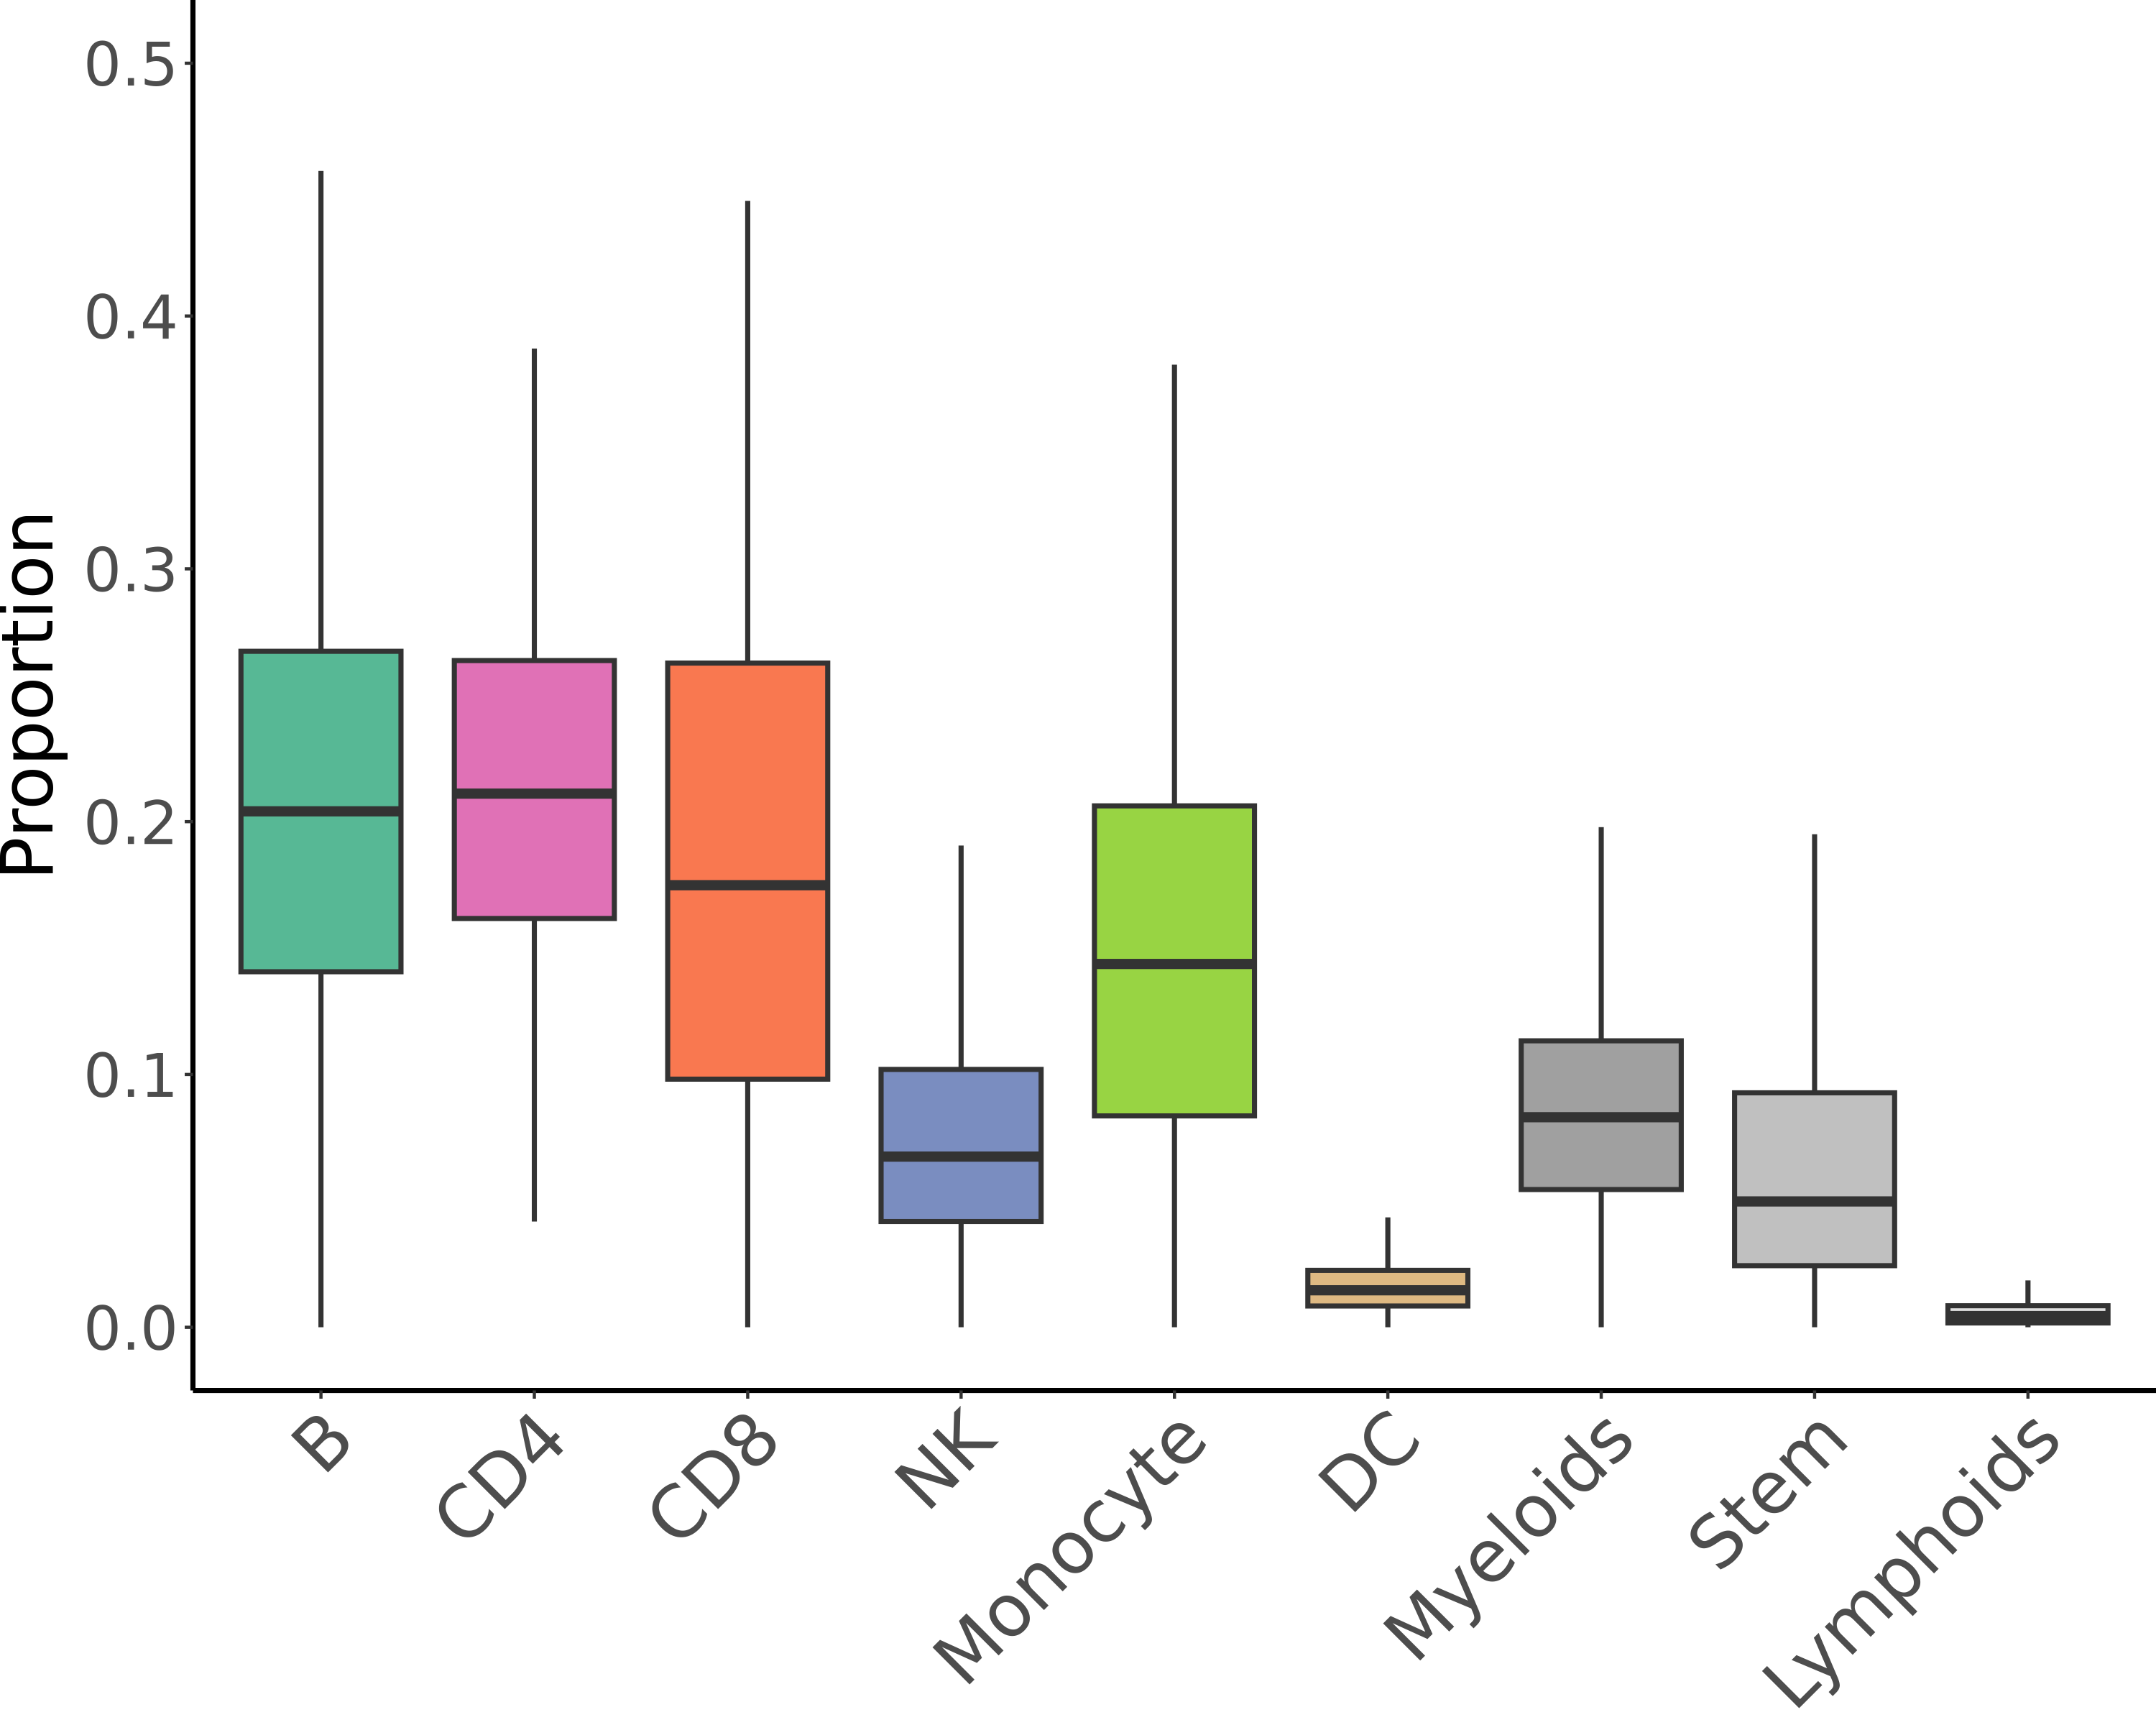

In [12]:
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res=300)
colors = c('#57B895', '#E071B6', '#F97850', '#7A8DC0', '#98D443', '#DEB982', '#A0A0A0', '#C0C0C0', '#E0E0E0') # set2
label_font = 24
axis_font = 20
box = ggplot(long, aes(x=factor(Cell, levels=levels), y=Prop, fill=factor(Cell, levels=levels))) + 
  geom_boxplot(lwd=0.8, outlier.shape = NA) + 
  ylab('Proportion') + theme_classic() + ylim(c(0, 0.5)) + 
  theme(axis.text.y=element_text(size=axis_font),
        axis.title.x=element_blank(),
        axis.title.y=element_text(size=label_font, margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.text.x = element_text(size=label_font, angle = 45, hjust = 1),
        legend.position = "none",
        panel.background = element_blank(),
        plot.margin = unit(c(0, 0, 0, 0), "cm"),
        axis.line.x=element_line(linewidth=0.8),
        axis.line.y=element_line(linewidth=0.8)) +
  scale_fill_manual(values=colors, breaks=levels, name=NULL)
box

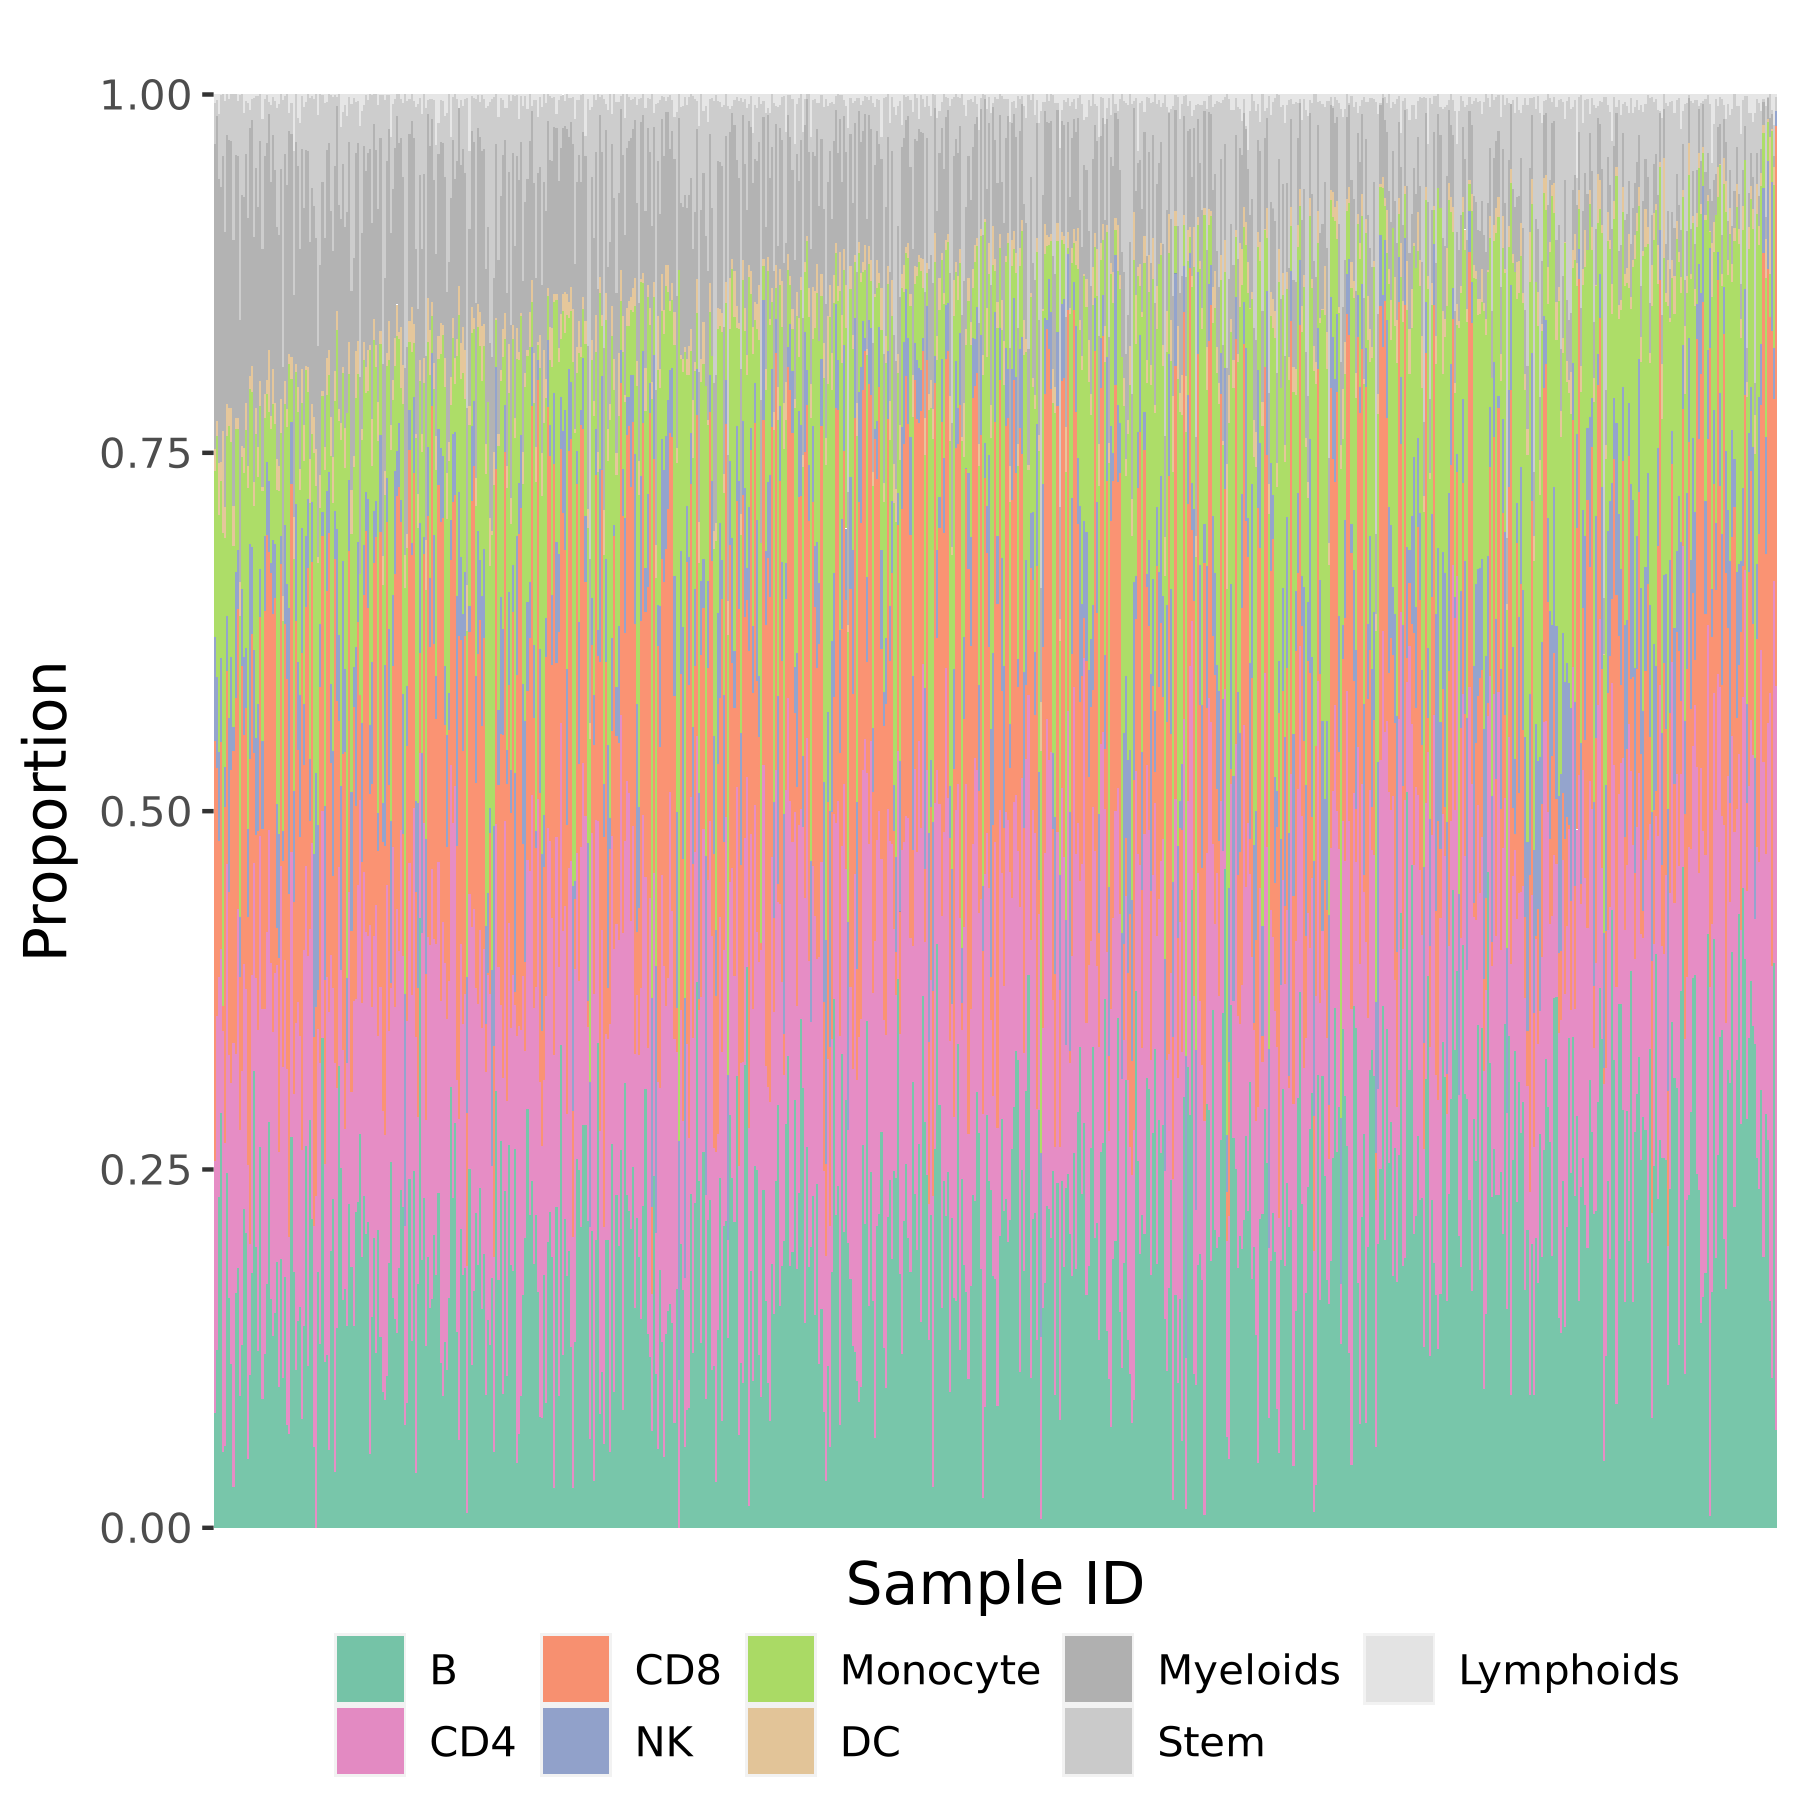

In [135]:
options(repr.plot.width=6, repr.plot.height=6, repr.plot.res=300)
bar = ggplot(long, aes(fill=factor(Cell, levels=rev(levels)), y=Prop, x=factor(Sample, levels=wide$Sample))) +
  geom_bar(position="fill", stat="identity", width=1, alpha=0.8) +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text.y=element_text(size=10),
        axis.title.x=element_text(size=14, margin = margin(t = -12, r = 0, b = 0, l = 0)),
        axis.title.y=element_text(size=14, margin = margin(t = 0, r = 5, b = 0, l = 0)),
        legend.text=element_text(size=10),
        legend.margin=margin(0,0,0,0),
        legend.box.margin=margin(0,0,0,0),
        legend.box.spacing = unit(4, "pt"),
        legend.position='bottom',
        panel.background = element_blank()) +
  scale_fill_manual(values=colors, breaks=levels, name=NULL) +
  # scale_fill_brewer(palette="Set1", direction=-1, name='Cell type') +
  labs(x='Sample ID', y='Proportion') + ylim(c(0,1))
bar

# Brain

In [14]:
props_cibersortx = fread('../data/cibersortx/CIBERSORTx_Job28_Adjusted.txt', sep='\t')
props = t(props_cibersortx[,2:9])
colnames(props) = props_cibersortx$Mixture
props = data.frame(Category=colnames(props_cibersortx)[2:9], props)

In [15]:
props

,Category,GTEX.1117F.3226.SM.5N9CT,GTEX.111FC.3126.SM.5GZZ2,GTEX.1128S.2726.SM.5H12C,GTEX.117XS.3026.SM.5N9CA,GTEX.1192X.3126.SM.5N9BY,GTEX.11DXW.1126.SM.5H12Q,GTEX.11DXY.3226.SM.5GIDE,GTEX.11EI6.3026.SM.5GZZO,GTEX.11EMC.3226.SM.5EGKW,⋯,GTEX.ZAK1.3026.SM.5S2MJ,GTEX.ZDXO.2126.SM.4WKFI,GTEX.ZE7O.3126.SM.5HL5X,GTEX.ZE9C.3026.SM.4WKHB,GTEX.ZF28.3026.SM.4WKHP,GTEX.ZUA1.3026.SM.59HJC,GTEX.ZVT3.3026.SM.5E43N,GTEX.ZYFD.3026.SM.5E44C,GTEX.ZYY3.3126.SM.5SI9L,GTEX.ZZPT.3026.SM.5GZXH
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Inhibitory neurons,Inhibitory neurons,0.02874556,0.086255135,0.11372544,0.15034892,0.01646038,0.120331428,0.13236876,0.12749508,0.12374569,⋯,0.16078705,0.096963029,0.17928127,0.10544214,0.08782123,0.216806037,0.07206795,0.13455042,0.06380951,0.02321592
Oligodendrocytes,Oligodendrocytes,0.27457305,0.427105980,0.11313109,0.14352685,0.38351305,0.152124314,0.15185737,0.08253834,0.09732963,⋯,0.09625787,0.199566531,0.07048442,0.20961813,0.11872646,0.061739175,0.06800889,0.14070546,0.07188890,0.16867749
Excitatory neurons,Excitatory neurons,0.30349035,0.261924094,0.34643512,0.46696791,0.28043705,0.407552503,0.39074634,0.19691076,0.21272136,⋯,0.37045633,0.300199263,0.22103276,0.31752021,0.36414194,0.403595831,0.39726045,0.43142673,0.26837109,0.24047185
Astrocytes,Astrocytes,0.31274935,0.154278815,0.32824433,0.13134285,0.22785555,0.271054234,0.21250077,0.42833132,0.42088569,⋯,0.24932682,0.323896188,0.42094025,0.27711166,0.31579791,0.213238722,0.33953864,0.20460384,0.26782772,0.36239260
OPCs,OPCs,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,⋯,0.01893841,0.000000000,0.02897887,0.00000000,0.00000000,0.000000000,0.00000000,0.00000000,0.00000000,0.00000000
Microglia,Microglia,0.00788571,0.042046170,0.03681524,0.03822771,0.02199521,0.023449412,0.06252987,0.08952167,0.03677396,⋯,0.04408067,0.033211624,0.02026029,0.03148678,0.03260198,0.058944182,0.03838289,0.02845113,0.08149202,0.07308910
Pericytes,Pericytes,0.01907288,0.004328325,0.02276023,0.01221892,0.01417747,0.006271039,0.01318450,0.02883886,0.03589709,⋯,0.01483023,0.005481026,0.02930820,0.02984526,0.03538505,0.009326207,0.01988303,0.02651155,0.11439328,0.07123116
Endothelial,Endothelial,0.05348311,0.024061480,0.03888854,0.05736684,0.05556129,0.019217070,0.03681238,0.04636397,0.07264657,⋯,0.04532262,0.040682339,0.02971394,0.02897581,0.04552543,0.036349844,0.06485814,0.03375087,0.13221747,0.06092188


In [16]:
## barplot
wide = props[,-1] %>% t() %>% as.data.frame() %>% setNames(props[,1]) %>%  tibble::rownames_to_column("Sample")
cmns = colMeans(wide[,-1])
ord = c(1, order(-cmns) + 1)
wide = wide[,ord]
levels = c('Excitatory neurons', 'Inhibitory neurons', 'Astrocytes', 'Oligodendrocytes',
           'Microglia', 'OPCs', 'Endothelial', 'Pericytes')
wide2 = wide[order(wide$`Excitatory neurons`, decreasing=T),]
long2 <- wide2 %>% pivot_longer(cols=!Sample, names_to='Cell', values_to='Prop')

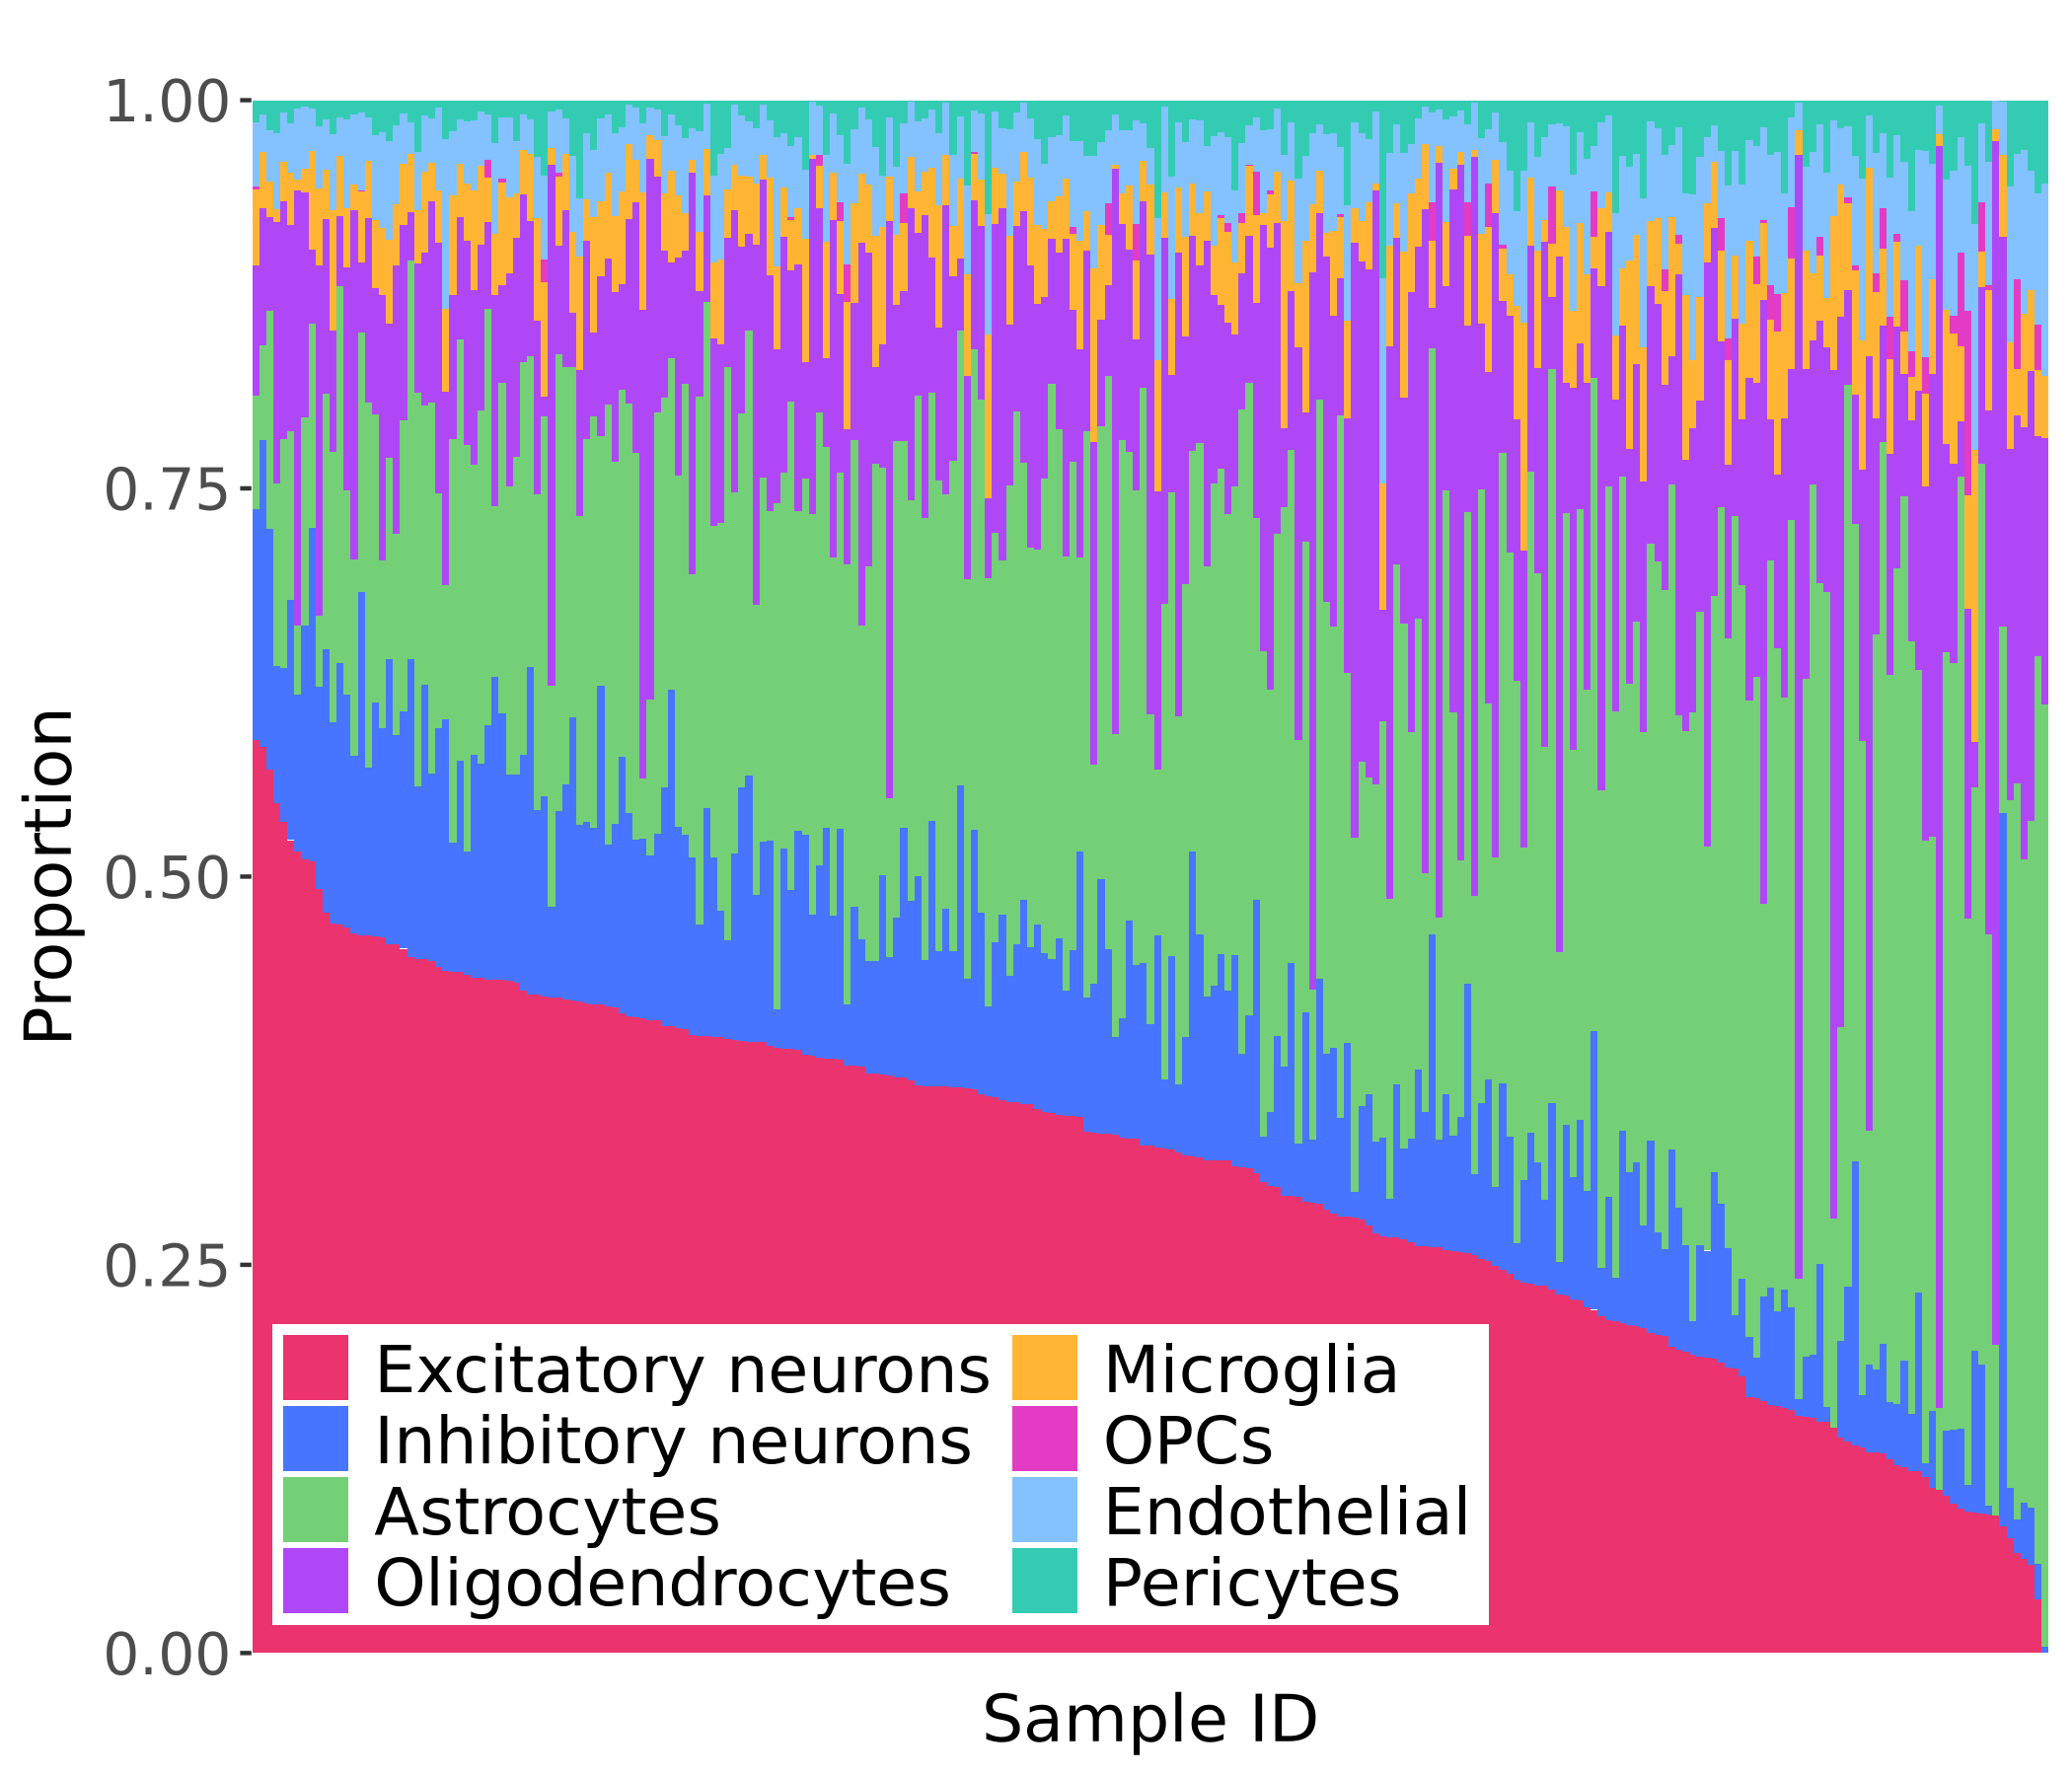

In [68]:
colors <- c("#e60049", "#1a53ff", "#51C455", "#9b19f5", "#ffa300", "#dc0ab4", "#66b2ff", "#00bfa0")
options(repr.plot.width=7, repr.plot.height=6, repr.plot.res=300)
bar = ggplot(long2, aes(fill=factor(Cell, levels=rev(levels)), y=Prop, x=factor(Sample, levels=wide2$Sample))) +
  geom_bar(position="fill", stat="identity", width=1, alpha=0.8) +
  theme(axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.text.y=element_text(size=14),
        axis.title.x=element_text(size=16, margin = margin(t = -12, r = 0, b = 0, l = 0)),
        axis.title.y=element_text(size=16, margin = margin(t = 0, r = 5, b = 0, l = 0)),
        legend.text=element_text(size=16),
        legend.margin=margin(2,6,2,2),
        # legend.box.margin=margin(2,2,2,2),
        legend.box.spacing = unit(4, "pt"),
        legend.position = c(.35, .15),
        # legend.spacing.x = unit(2.0, 'cm'),
        panel.background = element_blank()) +
  guides(fill = guide_legend(nrow = 4)) +
  scale_fill_manual(values=colors, breaks=levels, name=NULL) +
  labs(x='Sample ID', y='Proportion') + ylim(c(0,1))
bar

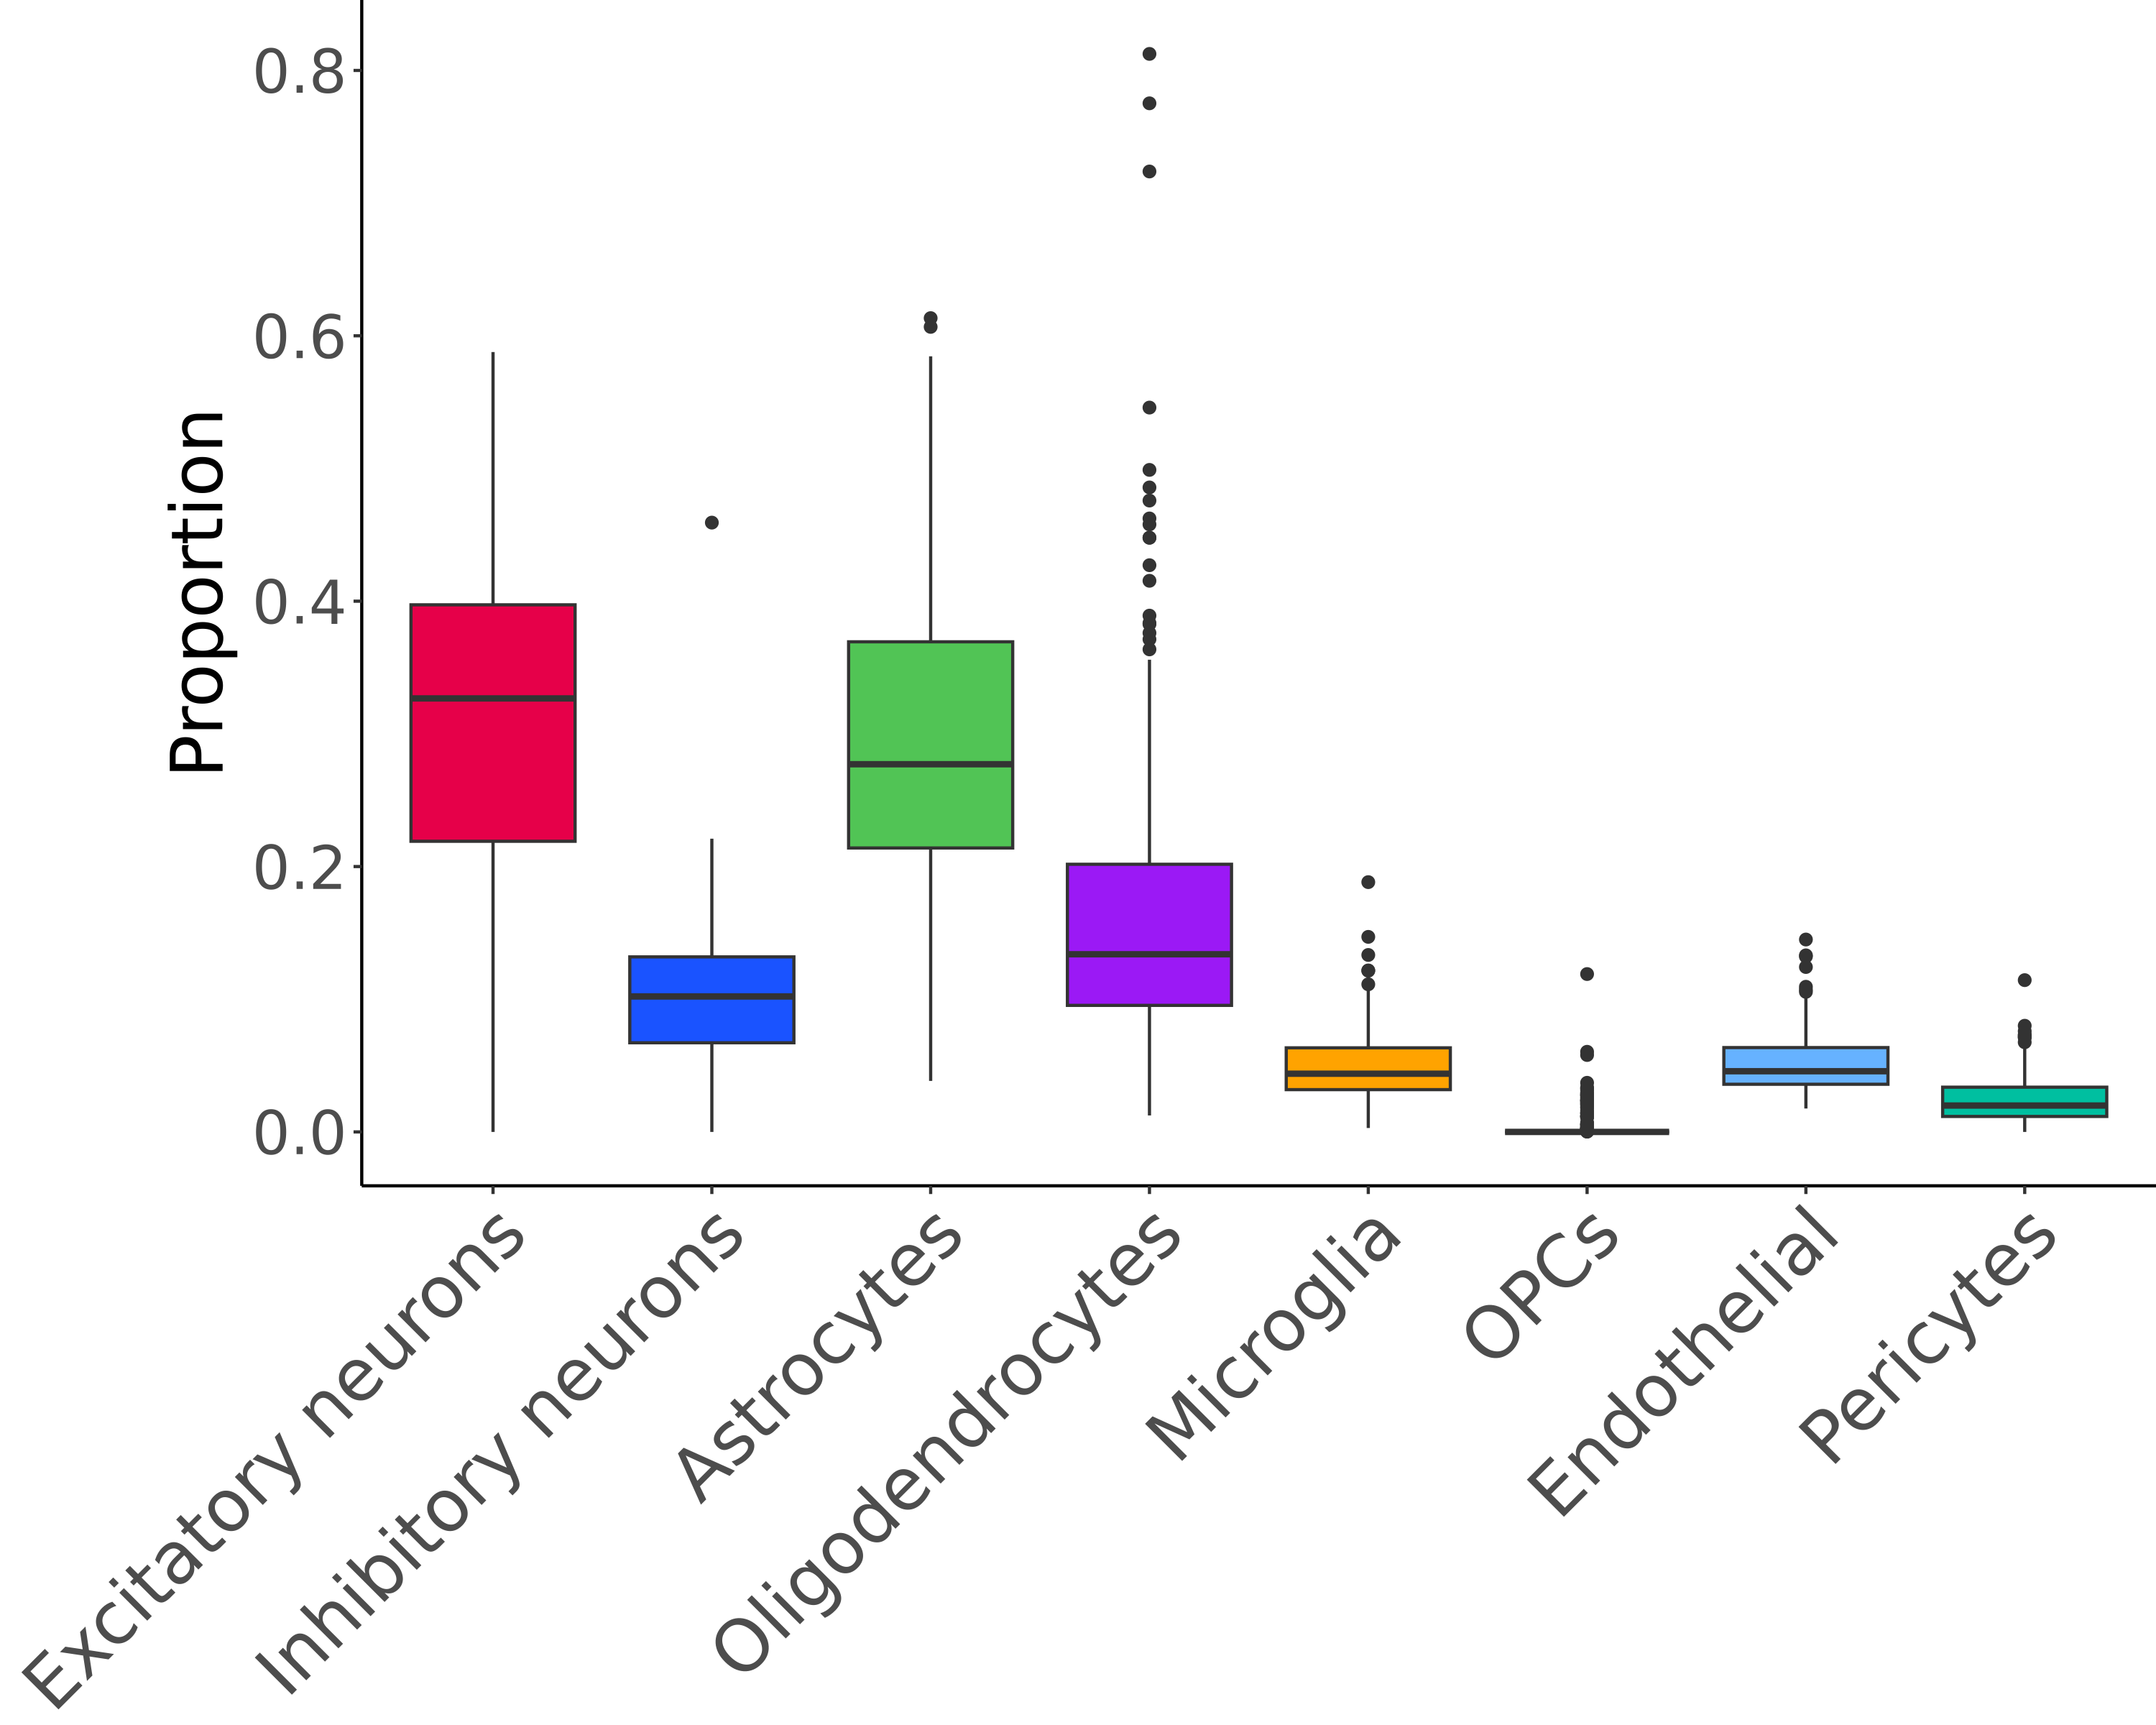

In [124]:
## boxplot
options(repr.plot.width=10, repr.plot.height=8, repr.plot.res=300)
label_font = 24
axis_font = 20
long <- wide %>% pivot_longer(cols=!Sample, names_to='Cell', values_to='Prop')
box = ggplot(long, aes(x=factor(Cell, levels=levels), y=Prop, fill=factor(Cell, levels=levels))) + 
  geom_boxplot() + 
  ylab('Proportion') + theme_classic() +
  theme(axis.text.y=element_text(size=axis_font),
        axis.title.x=element_blank(),
        axis.title.y=element_text(size=label_font, margin = margin(t = 0, r = 5, b = 0, l = 0)),
        axis.text.x = element_text(size=label_font, angle = 45, hjust = 1),
        legend.position = "none",
        panel.background = element_blank(),
        plot.margin = unit(c(0, 0, 0, 2), "cm")) +
  scale_fill_manual(values=colors, breaks=levels, name=NULL)
box